![alt text](https://blog-assets.hootsuite.com/wp-content/uploads/2019/04/sentiment-analysis-tools-1.png)

## Overview

This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the dataset you'll find information about businesses across multiple metropolitan areas across different countries.

## Inspiration
Natural Language Processing & Sentiment Analysis

What's in a review? Is it positive or negative? Yelp's reviews contain a lot of metadata that can be mined and used to infer meaning, business attributes, and sentiment.

## Data Downlaod
Use wget command to download data and unzip it for further use



In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/29760/37927/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589205799&Signature=ckj%2BtNjJZUwI5BTreMRYrmkm6jAiPVC1m9kM8ySAz9Xgqim5hZdYmJPZ%2BPhDZm83tUQ%2F8Yb3MlWRa1dwonxQgV3MujXiME8N%2FF5mIfEkaqfjUft2%2BeuRf1qKz7OHLJY5YUSPg3NssJZ4f3OLh7CEKPtaIFnY2XQ9CH0nz6yREgesC7pkUaYHCMAuzy12t%2FULIICKckGivWK5lBbImv22fHycBCRvQvf7EO21H4njevfH4kIaoDdDc4%2B9vj49AiFFkSDWTEJ76FEh9gV2iI2RlkKvusbfS18iKHd8OwGR3qyKavLokLedc9DxnAHWi18D8edu0FnZFh4b0FxVLddIWA%3D%3D&response-content-disposition=attachment%3B+filename%3Dyelp-reviews-dataset.zip" -c -O 'yelp-reviews-dataset.zip'

--2020-05-08 21:19:53--  https://storage.googleapis.com/kaggle-data-sets/29760/37927/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589205799&Signature=ckj%2BtNjJZUwI5BTreMRYrmkm6jAiPVC1m9kM8ySAz9Xgqim5hZdYmJPZ%2BPhDZm83tUQ%2F8Yb3MlWRa1dwonxQgV3MujXiME8N%2FF5mIfEkaqfjUft2%2BeuRf1qKz7OHLJY5YUSPg3NssJZ4f3OLh7CEKPtaIFnY2XQ9CH0nz6yREgesC7pkUaYHCMAuzy12t%2FULIICKckGivWK5lBbImv22fHycBCRvQvf7EO21H4njevfH4kIaoDdDc4%2B9vj49AiFFkSDWTEJ76FEh9gV2iI2RlkKvusbfS18iKHd8OwGR3qyKavLokLedc9DxnAHWi18D8edu0FnZFh4b0FxVLddIWA%3D%3D&response-content-disposition=attachment%3B+filename%3Dyelp-reviews-dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
! unzip yelp-reviews-dataset.zip

Archive:  yelp-reviews-dataset.zip
replace yelp.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: yelp.csv                


Import python packages

In [0]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load the data and check varaibles details

In [0]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('../content/yelp.csv')
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)
# COLUMN NAMES
print("Column names:")
print(data.columns)
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())
# DATASET SUMMARY
#data.describe(include='all')

Shape of the dataset:
(10000, 10)
Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object
Few dataset entries:
              business_id        date  ... useful  funny
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  ...      5      0
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  ...      0      0
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  ...      1      0
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  ...      2      0
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  ...      0      0

[5 rows x 10 columns]


## Review Preprocessing and EDA

Create a new column:
The new column will be - "length". This column will hold the length of the review.

In [0]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


We will visualize the if there is any correlation between stars and the length of the review.

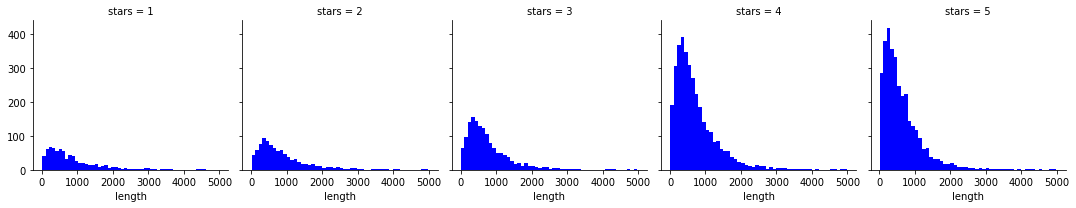

In [0]:
# COMPARING TEXT LENGTH TO STARS
graph_stars = sns.FacetGrid(data=data,col='stars')
graph_stars.map(plt.hist,'length',bins=50,color='blue')

**Mean Value of the Vote columns**:
There are 3 voting columns for the reviews - funny, cool and useful. Let us now find the mean values with respect to the stars given to the review and plot correlation among them

In [0]:
stval = data.groupby('stars').mean()
stval.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length

Thus, we can say that the reviews marked cool are not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

Classifying the dataset and splitting it into the reviews and stars

In [0]:
# CLASSIFICATION
classes_data = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
classes_data.head()
print(classes_data.shape)

# Seperate the dataset into X and Y for prediction
x = classes_data['text']
y = classes_data['stars']
print(x.head())
print(y.head())

(5547, 11)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


**Remove stopwords and punctuations**

**Perform Vectorization** : Convert each word into a unique number  

In [0]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=process_text).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
#print(r0)
vocab0 = vocab.transform([r0])
#print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
#print("Getting the words back:")
#print(vocab.get_feature_names()[19648])
#print(vocab.get_feature_names()[10643])

31336


"\n    Now the words in the review number 78 have been converted into a vector.\n    The data that we can see is the transformed words.\n    If we now get the feature's name - we can get the word back!\n"

Vectorization of the whole review set and and check the sparse matrix

In [0]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


##Sentiment Analysis Modeling

Before building any model we need to split data into train and test set

In [0]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

**Random Forest Model**

![alt text](https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
pred_output = model_rf.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,pred_output))
print("Score:",round(accuracy_score(y_test,pred_output)*100,2))
print("Classification Report:",classification_report(y_test,pred_output))

Confusion Matrix for Random Forest Classifier:
[[ 30  38  94]
 [  2 108 182]
 [  1  18 637]]
Score: 69.82
Classification Report:               precision    recall  f1-score   support

           1       0.91      0.19      0.31       162
           3       0.66      0.37      0.47       292
           5       0.70      0.97      0.81       656

    accuracy                           0.70      1110
   macro avg       0.76      0.51      0.53      1110
weighted avg       0.72      0.70      0.65      1110



**Multilayer perceptron**


![alt text](https://miro.medium.com/max/3446/1*-IPQlOd46dlsutIbUq1Zcw.png)

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN).

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [0]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
pred_mlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,pred_mlp))
print("Score:",round(accuracy_score(y_test,pred_mlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,pred_mlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 94  36  32]
 [ 18 191  83]
 [  9  62 585]]
Score: 78.38
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.58      0.66       162
           3       0.66      0.65      0.66       292
           5       0.84      0.89      0.86       656

    accuracy                           0.78      1110
   macro avg       0.76      0.71      0.73      1110
weighted avg       0.78      0.78      0.78      1110



Since multilayer perceptron classifier has the best result, we will use it to predict a random positive review, a random average review and a random negative review!

**POSITIVE REVIEW**

In [0]:
# POSITIVE REVIEW
positive_review = data['text'][0]
print(positive_review)
print("Actual Rating: ",data['stars'][0])
positive_review_vector = vocab.transform([positive_review])
print("Predicted Rating:")
mlp.predict(positive_review_vector)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5
Predicted Rating:


5

**AVERAGE REVIEW**

In [0]:
# AVERAGE REVIEW
average_review = data['text'][16]
print(average_review)
print("Actual Rating: ",data['stars'][16])
average_review_transform = vocab.transform([average_review])
print("Predicted Rating:")
mlp.predict(average_review_transform)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

**NEGATIVE REVIEW**

In [0]:
# NEGATIVE REVIEW
negative_review = data['text'][16]
print(negative_review)
print("Actual Rating: ",data['stars'][23])
negative_review_transform = vocab.transform([negative_review])
print("Predicted Rating:")
mlp.predict(negative_review_transform)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3